In [1]:
#import statement:

import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:

# reading csv files
df = pd.read_csv('Applications.csv')
df.head()

,suite,name,links,topic,description,total_codeLines,PL,fortranLines,cLines,cppLines,...,OpenCL,dd,loc_dd,proc_sch,loc_sch,storage,v,rd1,nv,rd2
0,Chatterbug,chatterbug,https://github.com/hpcgroup/chatterbug,Mimic of Communication Patterns,A suite of communication-intensive proxy appli...,1056,C++,0,0,1056,...,no,replicated,?,static,unstr-mesh.c[86-94],0.156,1.0,-,no,-
1,CORAL-2,Kripke,https://github.com/LLNL/Kripke,MD,"Kripke is a simple, scalable, 3D Sn determinis...",5350,C++,0,0,2471,...,no,distributed,PartionSpace.cpp[75-123],static,PartitionSpace.cpp,0.420,1.2.4,6/14/2019,no,-
2,CORAL-2,TeaLeaf is a mini-app that solves the linear h...,https://github.com/CEED/Laghos,SPH: Gas dynamics,Laghos (LAGrangian High-Order Solver) is a min...,8230,C++,0,0,7494,...,no,replicated,?,dynamic,Loadbalance.f90[,0.928,3.1,4/10/2021,no,-
3,ExaGraph,miniVite,https://github.com/Exa-Graph/miniVite,Community Detection - Louvain method,miniVite is a proxy app that implements a sing...,2429,C++,0,0,195,...,no,distributed,graph.hpp [367-377],dynamic,graph.hpp [from 980 onwards?],0.148,1.2,4/10/2021,no,-
4,ExMatEx,ASPA-master,https://github.com/exmatex/ASPA/tree/master/doc,Adaptive Sampling,The purpose of ASPA (Adaptive Sampling Proxy A...,29119,C++,0,0,12956,...,no,replicated,MPI.cc,static,MPI.cc,5.500,master,1/23/2014,no,-


## Removing rows with dirty data in rd1.

In [42]:
df = df[df.rd1.notnull()]
df = df[df.rd1 != '-']
df = df[df.rd1 != '2017']

In [54]:
df.shape,df.rd1.unique()

((37, 25),
 array(['6/14/2019', '4/10/2021', '1/23/2014', '10/31/2014', '7/18/2018',
        '11/23/2021', '11/22/2017', '10/24/2017', '7/6/2016', '4/18/2018',
        '10/2/2018', '8/31/2019', '7/19/2018', '7/31/2018', '8/19/2019',
        '9/5/2018', '8/6/2020', '4/26/2021', '10/13/2020', '7/22/2020',
        '7/20/2020', '01/26/2022', '4/21/2022', '3/14/2018', '3/16/2007',
        '4/11/2007', '2/2/2007', '1/17/2005', '2/5/2007', '2/6/2007',
        '9/3/2009', '4/20/2009', '6/2/2015'], dtype=object))

## Correcting 'dd' column values

In [55]:
df = df[df.dd.notnull()]
df['dd']=df['dd'].replace(['-'],'no')
df = df[df.dd != '?']
df = df[df.dd != 'centralized?']
df['dd']=df['dd'].replace(['Replicated'],'replicated')
df['dd']=df['dd'].replace(['distributed cubic mesh'],'distributed')
df['dd']=df['dd'].replace(['replicated?'],'replicated')

In [56]:
df.shape, df.dd.unique()

((37, 25), array(['distributed', 'replicated', 'no'], dtype=object))

## Correcting 'Topic' column values

In [28]:
df['topic']=df['topic'].replace(['Artificial Intelligence '],'AI')
df['topic']=df['topic'].replace(['AI: Deep Learning'],'AI')
df['topic']=df['topic'].replace(['MD: Method of Characteristics'],'MD')
df['topic']=df['topic'].replace(['MD: Visualization'],'MD')
df['topic']=df['topic'].replace(['MD: NeuroScience Simulations'],'MD')
df['topic']=df['topic'].replace(['SPH: Gas dynamics'],'SPH')
df['topic']=df['topic'].replace(['SPH: Astrophysics'],'SPH')
df['topic']=df['topic'].replace(['SPH: Atmospheric and Ocean physics'],'SPH')
df['topic']=df['topic'].replace(['SPH: Geodynamics'],'SPH')
df['topic']=df['topic'].replace(['CFD-DEM framework'],'CFD')
df['topic']=df['topic'].replace(['Partial Differential equations'],'PDE')
df['topic']=df['topic'].replace(['PDE - Navier Stokes'],'PDE')
df['topic']=df['topic'].replace(['PDE - Stencil Calculation'],'PDE')




In [29]:
topics = df['topic']
topics.unique()

array(['Mimic of Communication Patterns', 'MD', 'SPH',
       'Community Detection - Louvain method', 'Adaptive Sampling', 'CFD',
       'PDE', 'Finite Element', 'Triangle Enumeration',
       'Linear Circuit Simulator', 'I/O componentization ', 'MC',
       'Structured Adaptive Mesh Refinement',
       'Logic programming language', 'Tensor Factorization',
       'Equation Radiative Transfer', 'Package of Scientific Problem',
       'Time-Depnedent Density Functional Theory', 'GPU Clusters',
       'Linear Algebra', 'AI', 'Mesh generation', 'Metagenomic Assembler',
       'Template library for MPI',
       'Speckle Reducing Anisotropic Diffusion',
       'Heterogenerous Computing', 'Perl interpreter',
       'Biomedical Imaging', 'Ray tracing',
       'Discrete Event simulation - computer network',
       'XML to HTML conversion via XSLT',
       'Games: Sudoku Puzzle Generator',
       'Physics: Quantum Chronodynamics',
       'Graphics: Parallel Ray Tracing', '3D Eulerian Hydrodynami

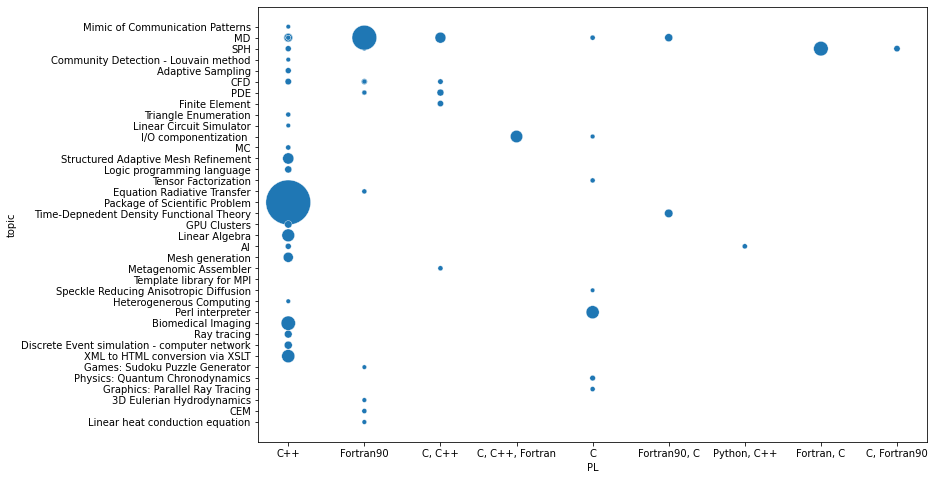

In [31]:
# Control figure size for this notebook:
plt.rcParams['figure.figsize'] = [12, 8]

 
# use the scatterplot function to build the bubble map
sns.scatterplot(data=df, y="topic", x="PL", size="total_codeLines", legend=False, sizes=(20, 2000))

# show the graph
plt.show()